In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix , classification_report,f1_score, accuracy_score


# Import Data set

In [2]:
d = pd.read_excel('final.xlsx')
d

,Gender,Age,family-members,family-relation,Mother-edu,Father-edu,Mother-job,Father-job,guardian,travel-duration,...,Math,mScience,Science,mLanguage,Language,mSport,Sport,mArt,Art,B5
0,F,17,S,1,3,2,other,other,mother,2,...,0,12,4,20,20,12,11,10,20,B
1,M,15,S,5,3,3,other,other,mother,1,...,3,7,9,3,5,8,12,12,3,C
2,M,16,S,3,4,3,services,other,mother,1,...,6,4,4,2,0,12,11,16,11,B
3,F,15,L,4,4,4,teacher,services,mother,1,...,7,12,4,5,5,5,6,13,8,C
4,M,15,L,4,2,2,services,services,father,1,...,19,11,11,18,19,14,8,17,19,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,M,16,L,4,2,2,at_home,other,mother,3,...,15,12,17,2,6,3,10,12,11,B
454,M,15,L,4,4,4,other,other,father,4,...,13,7,6,12,7,11,9,10,14,B
455,M,16,L,4,4,4,teacher,teacher,mother,1,...,11,10,12,9,8,5,7,7,4,C
456,F,16,S,4,2,2,services,services,other,2,...,11,4,5,9,6,4,7,12,6,D


<h2>Data set summary<h2>
 <h3>Demography</h3><br>
* <b>Students</b>' Academic Performance Dataset (xAPI-Edu-Data)<br>



* <b>sup-school:</b> Support by institution after school<br>
* <b>sup-family:</b> Number of Instances: 480Support by family after school<br>
*   <b>Gender:</b> Gender<br>
* 	<b>Age:</b> Age<br>
* 	<b>family-members:</b> Number of family members<br>
* 	<b>family-relation:</b> The quality of parents' relationships<br>
* 	<b>Mother-edu: </b>Mother's education<br>
* 	<b>Father-edu: </b>Father's education<br>
* 	<b>Mother-job: </b>Mother's job<br>
* 	<b>Father-job: </b>Father's job<br>
* 	<b>guardian: </b> Someone who is guardian the student.<br>
* 	<b>travel-duration: </b> A period of time on the school path<br>
<br><br><h3>Behavioural</h3><br>
* 	<b>studytime:</b> The period when the student studies during the day<br>
* 	<b>sup-school:</b>  Support by institution after school<br>
* 	<b>sup-family:</b>  Support by family after school<br>
* 	<b>higher-edu:</b> Is the student plans to continue studying to higher education<br>
* 	<b>internet:</b> Internet access<br>
* 	<b>extar class:</b><br>
* 	<b>work:</b><br>
* 	<b>internet use:</b><br>
* 	<b>TV use:</b><br>
* 	<b>do Game:</b><br>
* 	<b>freetime:</b><br>
* 	<b>goout-rate:</b><br>
* 	<b>absences:</b><br>
* 	<b>attention:</b><br>
* 	<b>frind ship:</b><br>
<br><br><h3>Grades</h3><br>
* 	<b>mMath:</b><br>
* 	<b>Math:</b><br>
* 	<b>mScience:</b><br>
* 	<b>Science:</b><br>
* 	<b>mLanguage:</b><br>
* 	<b>Language:</b><br>
* 	<b>mSport:</b><br>
* 	<b>Sport:</b><br>
* 	<b>mArt:</b><br>
* 	<b>Art:</b><br>


In [3]:
pd.DataFrame(d.isnull().sum(), columns=['null count'])

,null count
Gender,0
Age,0
family-members,0
family-relation,0
Mother-edu,0
Father-edu,0
Mother-job,0
Father-job,0
guardian,0
travel-duration,0


In [4]:
def Encoder(d):
    q = [] 
    columnsToEncode = list(d.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            d[feature] = le.fit_transform(d[feature])
        except:
            print('Error encoding '+feature)
            q.append(feature)
    return d



from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

encode object data to int

In [5]:
d = Encoder(d)

<function matplotlib.pyplot.show(close=None, block=None)>

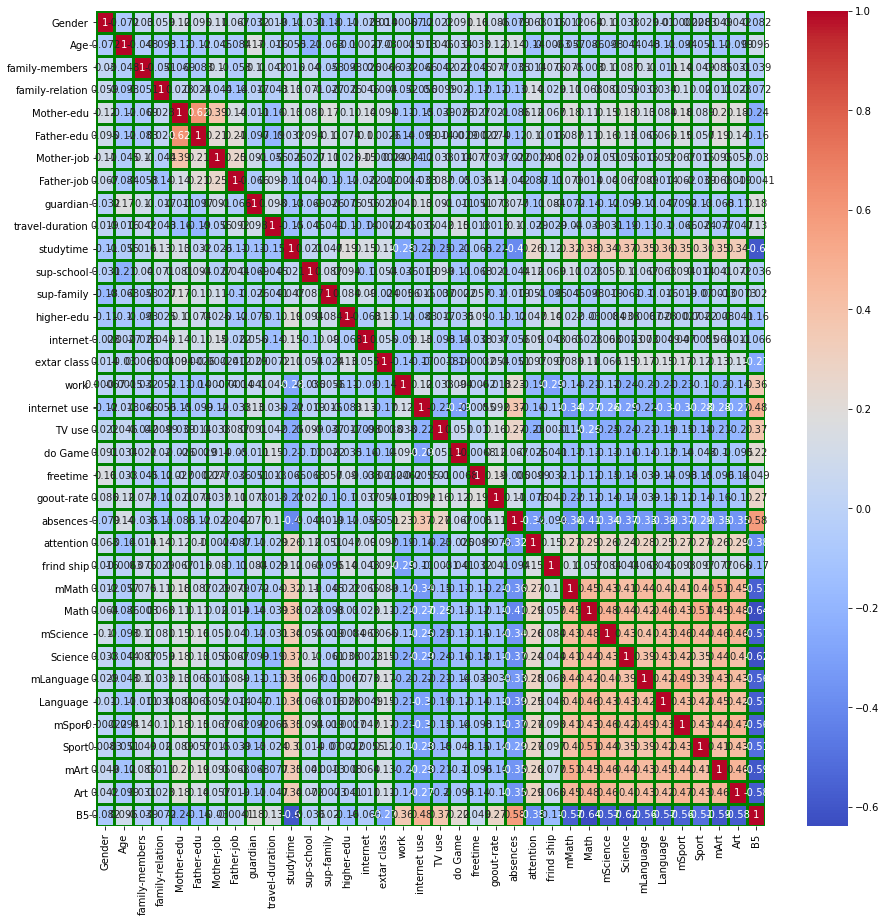

In [6]:
    plt.figure(figsize=(15,15))
    sns.heatmap(d.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'coolwarm')
    plt.show

In [7]:
#sns.pairplot(d)

In [8]:
d['B5']

0      1
1      2
2      1
3      2
4      1
      ..
453    1
454    1
455    2
456    3
457    3
Name: B5, Length: 458, dtype: int32

In [9]:
x = d.drop(['B5'], axis=1)
y = d['B5']

In [10]:
from sklearn.preprocessing import StandardScaler

SD = StandardScaler()
x = SD.fit_transform(x)

Checking the imbalance of classes

In [11]:
y.value_counts()

2    155
3    144
1    105
0     54
Name: B5, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x, y)

y.value_counts()

0    155
1    155
2    155
3    155
Name: B5, dtype: int64

In [13]:
#split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, stratify=y, test_size=0.2)

# <br><br>Model selection <br>

In [14]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix , classification_report,f1_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

<br><br>
# Initial fitting

XGBoost

In [15]:
clf = GradientBoostingClassifier()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.9052727272727272

test:  0.646


ElasticNet

In [16]:
clf = ElasticNet()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.4137665612500282

test:  0.420512520338377


Naive Bayes

In [17]:
clf = GaussianNB()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.7903232323232323

test:  0.7263333333333334


RandomForest

In [18]:
clf = RandomForestClassifier()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.8991717171717173

test:  0.7663333333333333


LogisticRegression

In [19]:
clf = LogisticRegression()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.862929292929293

test:  0.7256666666666667


SVM

In [20]:
clf = svm.SVC()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.901131313131313

test:  0.7823333333333333


DecisionTree

In [21]:
clf = DecisionTreeClassifier()

clf.fit(xtrain, ytrain)

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print('\ntrain: ', scores.mean())
scores = cross_val_score(clf, xtest, ytest, cv=5)
print('\ntest: ', scores.mean())


train:  0.7277979797979798

test:  0.6773333333333333


<br> <b>RF, SVM, XGB and LR </b>have better performanc than others so these models go for tuning.<br><br>

# SVM

Tuning hyperparameters with Randomized Search CV

In [22]:
clf_svm = svm.SVC()

svm_param = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

cv_clf_svm = RandomizedSearchCV(clf_svm, svm_param, cv=5)

cv_clf_svm.fit(xtrain, ytrain)

print(cv_clf_svm.best_params_)
print(cv_clf_svm.best_estimator_)
print(cv_clf_svm.best_score_)


{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
SVC(C=1000, gamma=0.001)
0.8830909090909091


<br><br>Training the model with the best parameters found 

In [23]:
clf_svm = cv_clf_svm.best_estimator_

clf_svm.fit(xtrain, ytrain)

ypredt = clf_svm.predict(xtrain)
ypred = clf_svm.predict(xtest)

print(classification_report(ytrain, ypredt))
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       124
           2       1.00      0.99      1.00       124
           3       0.99      1.00      1.00       124

    accuracy                           1.00       496
   macro avg       1.00      1.00      1.00       496
weighted avg       1.00      1.00      1.00       496

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.80      0.90      0.85        31
           2       0.87      0.65      0.74        31
           3       0.88      0.94      0.91        31

    accuracy                           0.87       124
   macro avg       0.87      0.87      0.87       124
weighted avg       0.87      0.87      0.87       124



<br><h3>Final model</h3>

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       124
           1       0.82      0.90      0.86       124
           2       0.92      0.78      0.84       124
           3       0.89      0.96      0.92       124

    accuracy                           0.89       496
   macro avg       0.89      0.89      0.89       496
weighted avg       0.89      0.89      0.89       496

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.77      0.97      0.86        31
           2       0.86      0.58      0.69        31
           3       0.82      0.90      0.86        31

    accuracy                           0.85       124
   macro avg       0.86      0.85      0.85       124
weighted avg       0.86      0.85      0.85       124



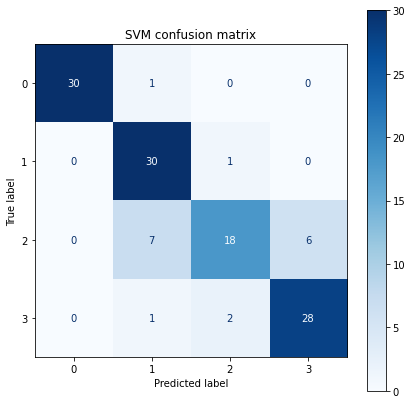

In [24]:
clf_svm = svm.SVC(C=120, 
                  gamma=0.0001)

clf_svm.fit(xtrain, ytrain)

ypredt = clf_svm.predict(xtrain)
ypred = clf_svm.predict(xtest)

print(classification_report(ytrain, ypredt))
print(classification_report(ytest, ypred))

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('SVM confusion matrix')
plot_confusion_matrix(clf_svm, xtest, ytest, cmap=plt.cm.Blues, ax=ax)  
plt.show()   

# Random forest

Tuning hyperparameters with Randomized Search CV

In [25]:
clf_rf = RandomForestClassifier()

rf_param =  {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

cv_clf_rf = RandomizedSearchCV(clf_rf, rf_param, cv=5)
cv_clf_rf.fit(xtrain, ytrain)

print(cv_clf_rf.best_params_)
print(cv_clf_rf.best_estimator_)
print(cv_clf_rf.best_score_)

{'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=180)
0.9152929292929294


<br><br>Training the model with the best parameters found 

In [26]:
clf_rf = RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=5,
                       n_estimators=110)
#clf_rf = cv_clf_rf.best_estimator_

clf_rf.fit(xtrain, ytrain)

ypredt = clf_rf.predict(xtrain)
ypred = clf_rf.predict(xtest)

print(classification_report(ytrain, ypredt))
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       124
           2       0.98      1.00      0.99       124
           3       1.00      0.98      0.99       124

    accuracy                           1.00       496
   macro avg       1.00      1.00      1.00       496
weighted avg       1.00      1.00      1.00       496

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.88      0.94      0.91        31
           2       0.84      0.87      0.86        31
           3       0.96      0.87      0.92        31

    accuracy                           0.91       124
   macro avg       0.91      0.91      0.91       124
weighted avg       0.91      0.91      0.91       124



<br><h3>Final model</h3>

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       124
           1       0.94      0.95      0.94       124
           2       0.86      0.91      0.89       124
           3       0.95      0.93      0.94       124

    accuracy                           0.93       496
   macro avg       0.94      0.93      0.93       496
weighted avg       0.94      0.93      0.93       496

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.78      0.81      0.79        31
           2       0.75      0.68      0.71        31
           3       0.84      0.87      0.86        31

    accuracy                           0.83       124
   macro avg       0.83      0.83      0.83       124
weighted avg       0.83      0.83      0.83       124



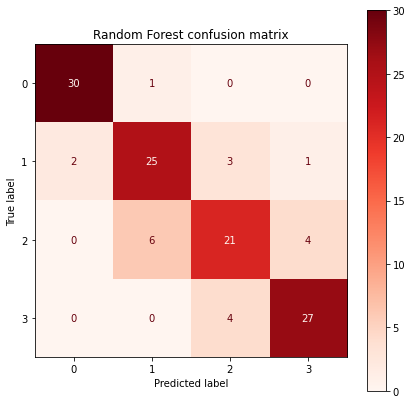

In [27]:
clf_rf = RandomForestClassifier(max_depth=5, 
                                max_features='sqrt', 
                                min_samples_split=4, 
                                n_estimators=20, 
                                random_state=42)

clf_rf.fit(xtrain, ytrain)

ypredt = clf_rf.predict(xtrain)
ypred = clf_rf.predict(xtest)

print(classification_report(ytrain, ypredt))
print(classification_report(ytest, ypred))

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Random Forest confusion matrix')
plot_confusion_matrix(clf_rf, xtest, ytest, cmap=plt.cm.Reds, ax=ax)  
plt.show()   

# Logistic Regression

Tuning hyperparameters with Randomized Search CV

In [29]:
clf_lr = LogisticRegression()

space = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

cv_clf_lr = RandomizedSearchCV(clf_lr, space, cv=5)

cv_clf_lr.fit(xtrain, ytrain)

print(cv_clf_lr.best_params_)
print(cv_clf_lr.best_estimator_)
print(cv_clf_lr.best_score_)

C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\An

C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 455, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed.

C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


{'solver': 'lbfgs', 'penalty': 'none', 'C': 100}
LogisticRegression(C=100, penalty='none')
0.8428080808080809


C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 455, in _check_solver
    "penalty='none' is not supported for the liblinear solv

<br><br>Training the model with the best parameters found 

<br><h3>Final model</h3>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       124
           2       0.98      0.98      0.98       124
           3       0.98      0.98      0.98       124

    accuracy                           0.99       496
   macro avg       0.99      0.99      0.99       496
weighted avg       0.99      0.99      0.99       496

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.87      0.87      0.87        31
           2       0.77      0.74      0.75        31
           3       0.87      0.87      0.87        31

    accuracy                           0.87       124
   macro avg       0.87      0.87      0.87       124
weighted avg       0.87      0.87      0.87       124



C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


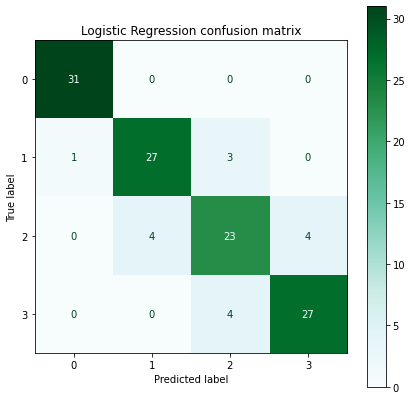

In [30]:
clf_lr = cv_clf_lr.best_estimator_

clf_lr.fit(xtrain, ytrain)

ypredt = clf_lr.predict(xtrain)
ypred = clf_lr.predict(xtest)

print(classification_report(ytrain, ypredt))
print(classification_report(ytest, ypred))

fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Logistic Regression confusion matrix')
plot_confusion_matrix(clf_lr, xtest, ytest, cmap=plt.cm.BuGn, ax=ax)  
plt.show()  

# <br><br> Plot learning curves for RF and SVM


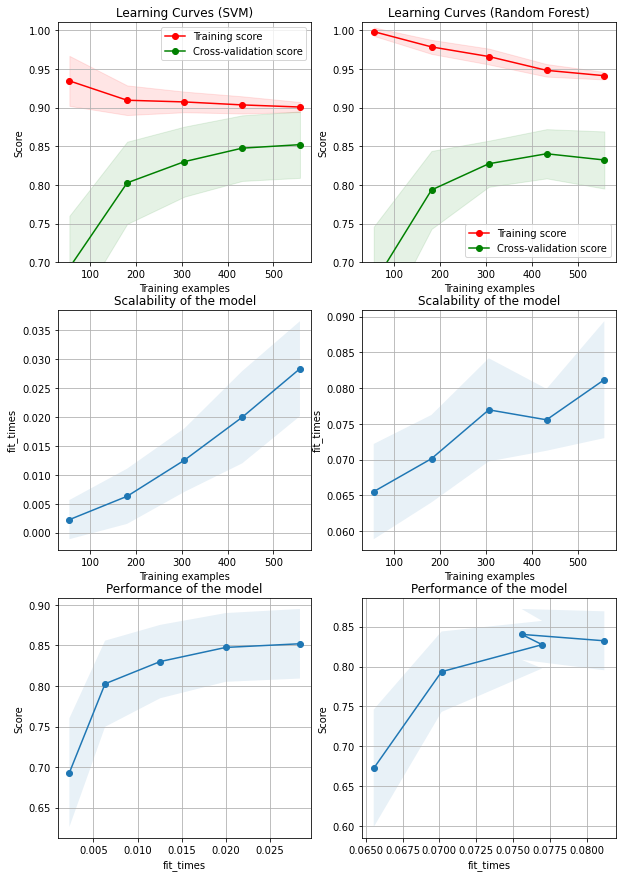

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = clf_svm
plot_learning_curve(estimator, title, x, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = clf_rf
plot_learning_curve(estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

plt.show()

# <br><br> Plot learning curves for XGB and LR


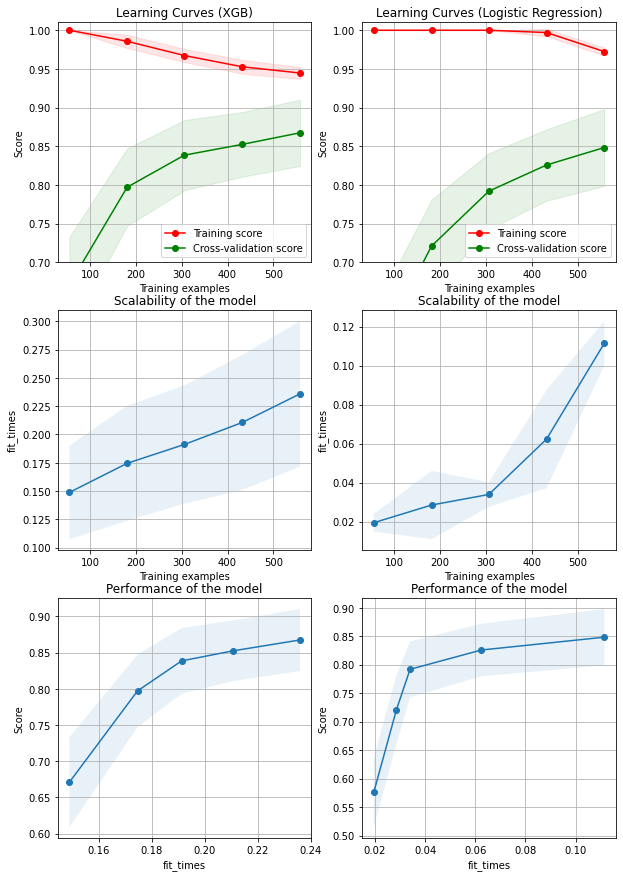

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (XGB)"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = clf_xgb
plot_learning_curve(estimator, title, x, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = clf_lr
plot_learning_curve(estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

plt.show()

<BarContainer object of 35 artists>

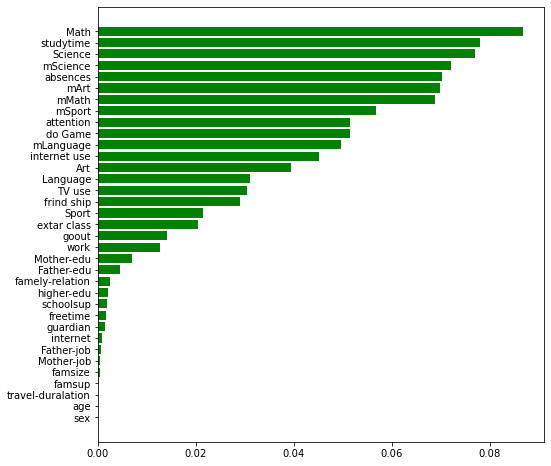

In [33]:
im = pd.Series(clf_rf.feature_importances_, index=['sex', 'age', 'famsize', 'famely-relation', 'Mother-edu', 'Father-edu',
       'Mother-job', 'Father-job', 'guardian', 'travel-duralation',
       'studytime', 'schoolsup', 'famsup', 'higher-edu', 'internet',
       'extar class', 'work', 'internet use', 'TV use', 'do Game', 'freetime',
       'goout', 'absences', 'attention', 'frind ship', 'mMath', 'Math',
       'mScience', 'Science', 'mLanguage', 'Language', 'mSport', 'Sport',
       'mArt', 'Art'])#.nlargest(15)

im.sort_values(ascending=True, inplace=True)

technologies=im.index
plt.figure(figsize=(8,8))
plt.barh(technologies,im,color="Green",)

With cross-validation

In [146]:
models = [clf_rf, clf_svm, clf_lr]
names = ["Random Forest", "SVC", "Logistic Regression", "ANN"]

train_acc = []
for model in models:
    acc = cross_val_score(model, xtrain, ytrain, scoring ='accuracy', cv=10)
    train_acc.append(acc)
    
test_acc = []
for model in models:
    acc = cross_val_score(model, xtest, ytest, scoring ='accuracy', cv=10)
    test_acc.append(acc)

C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\An

In [147]:
ANN_train = np.array([0.92349726, 0.92349726, 0.90983605, 0.91530055, 0.89344263,
                      0.9508197, 0.92622954, 0.92896175, 0.92349726, 0.91803277])

ANN_test = np.array([0.8043478, 0.8152174, 0.8586956, 0.8369565, 0.8586956,
                     0.8369565, 0.8043478, 0.84782606, 0.75, 0.8804348])

ANN_conf = np.array(([[10,  1,  0,  0],
                       [ 0, 17,  4,  0],
                       [ 0,  3, 27,  1],
                       [ 0,  0,  3, 26]]))

train_acc = np.vstack((train_acc, ANN_train))
test_acc = np.vstack((test_acc, ANN_test))

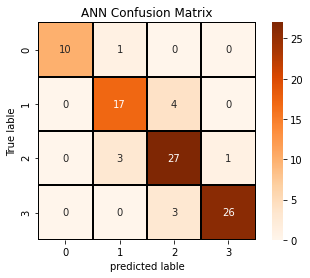

In [219]:
ax= plt.subplot()
sns.heatmap(ANN_conf, annot=True, fmt='g', ax=ax, cmap='Oranges', square=True,linewidths=2, linecolor='black');#annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_ylabel('True lable')
ax.set_xlabel('predicted lable')
ax.set_title('ANN Confusion Matrix'); 


# Plot the performance of models

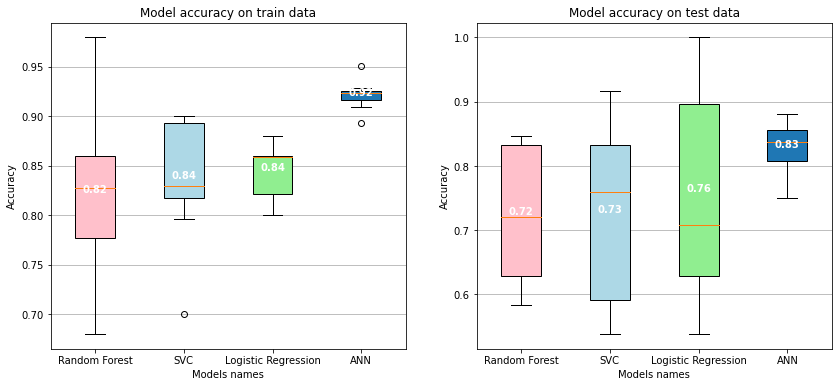

In [208]:
train_acc = np.transpose(train_acc)
test_acc = np.transpose(test_acc)
labels = names

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# rectangular box plot
bplot1 = ax1.boxplot(train_acc,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Model accuracy on train data')

# notch shape box plot
bplot2 = ax2.boxplot(test_acc,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Model accuracy on test data')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Models names')
    ax.set_ylabel('Accuracy')


m1=train_acc.mean(axis=0) #Mean values 
mL1 = [str(np.round(s, 2)) for s in m1]

st1=train_acc.std(axis=0) #Standard deviation values 
sT1=[str(np.round(s, 2)) for s in st1]

ind=0
for i in range (len(ax1.get_xticklabels())):
    ax1.text(i+1, m1[ind], mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind+=1

    
    
m1=test_acc.mean(axis=0) #Mean values 
mL1 = [str(np.round(s, 2)) for s in m1]

st1=test_acc.std(axis=0) #Standard deviation values 
sT1=[str(np.round(s, 2)) for s in st1]

ind=0
for i in range (len(ax2.get_xticklabels())):
    ax2.text(i+1, m1[ind], mL1[ind], horizontalalignment='center', color='w',  weight='semibold')
    ind+=1


    
    
plt.show()

# Calculate the importance of features

In [227]:
def f_selection(x, y, dataset, n_estimators='auto', alpha=0.05):
    from boruta import BorutaPy
    from sklearn.ensemble import RandomForestClassifier

    clf_rf = RandomForestClassifier()
    fs = BorutaPy(clf_rf, n_estimators , alpha=alpha)
    #fs = BorutaPy(clf_rf, n_estimators='auto')
    
    fs.fit(x, y)
    x = fs.transform(x)
    
    featuer_names = dataset.columns
    print('The important features of the dataset are as follows. \n')
    
    #print important feature
    print('{:<45}'.format('featuer_names') + '{:<8}'.format('ranking'), 'support \n')
    for i in range(len(featuer_names)-1):
        print('{:<45}'.format(featuer_names[i]) + '{:<8}'.format( str (fs.ranking_[i])), fs.support_[i])
    print(62*'-')
    print('total useful features are ', fs.n_features_)
    print('\n\n\n')
    fs.me
    return x, y

In [228]:
fs_x, fs_y = f_selection(x, y, d, n_estimators=10)

The important features of the dataset are as follows. 

featuer_names                                ranking  support 

Gender                                       13       False
Age                                          7        False
family-members                               12       False
family-relation                              10       False
Mother-edu                                   6        False
Father-edu                                   8        False
Mother-job                                   4        False
Father-job                                   9        False
guardian                                     11       False
travel-duration                              16       False
studytime                                    1        True
sup-school                                   17       False
sup-family                                   15       False
higher-edu                                   18       False
internet                                 

In [151]:
fs_xtrain, fs_xtest, fs_ytrain, fs_ytest = train_test_split(fs_x, fs_y, random_state=42, stratify=y, test_size=0.2)

Retrain the models on decreased dataset

In [152]:
models = [clf_rf, clf_svm, clf_lr]
names = ["Random Forest", "SVC", "Logistic Regression", "ANN"]

fs_train_acc = []
for model in models:
    acc = cross_val_score(model, fs_xtrain, fs_ytrain, scoring ='accuracy', cv=10)
    fs_train_acc.append(acc)
    
    
fs_test_acc = []
for model in models:
    acc = cross_val_score(model, fs_xtest, fs_ytest, scoring ='accuracy', cv=10)
    fs_test_acc.append(acc)
 

C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\M_Zafari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\M_Zafari\An

In [153]:
fs_ANN_train = np.array([ 0.863388, 0.87431693, 0.8797814, 0.87431693, 0.8797814,
                         0.8770492, 0.89071035, 0.88797814, 0.8852459, 0.88797814])

fs_ANN_test = np.array([0.7717391, 0.75, 0.73913044, 0.75, 0.75, 0.75,
                        0.76086956, 0.76086956, 0.76086956, 0.7608695])


fs_train_acc = np.vstack((fs_train_acc, fs_ANN_train))
fs_test_acc = np.vstack((fs_test_acc, fs_ANN_test))

# Plot the performance

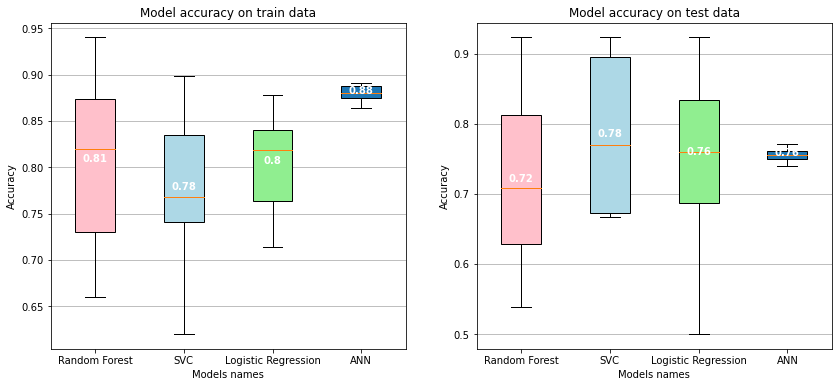

In [206]:
fs_train_acc = np.transpose(fs_train_acc)
fs_test_acc = np.transpose(fs_test_acc)
labels = ["Random Forest", "SVC", "Logistic Regression", "ANN"]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# rectangular box plot
bplot1 = ax1.boxplot(fs_train_acc,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Model accuracy on train data')

# notch shape box plot
bplot2 = ax2.boxplot(fs_test_acc,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Model accuracy on test data')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Models names')
    ax.set_ylabel('Accuracy')

    

m1=fs_train_acc.mean(axis=0) #Mean values 
mL1 = [str(np.round(s, 2)) for s in m1]

st1=fs_train_acc.std(axis=0) #Standard deviation values 
sT1=[str(np.round(s, 2)) for s in st1]

ind=0
for i in range (len(ax1.get_xticklabels())):
    ax1.text(i+1, m1[ind], mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind+=1

    
    
m1=fs_test_acc.mean(axis=0) #Mean values 
mL1 = [str(np.round(s, 2)) for s in m1]

st1=fs_test_acc.std(axis=0) #Standard deviation values 
sT1=[str(np.round(s, 2)) for s in st1]

ind=0
for i in range (len(ax2.get_xticklabels())):
    ax2.text(i+1, m1[ind], mL1[ind], horizontalalignment='center', color='w',  weight='semibold')
    ind+=1



    
plt.show()